# Import Modules & Settings

In [1]:
# Import libraries 

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Import Datasets

In [2]:
# Import CSV dataset

coles_df = pd.read_csv('Final.csv')
coles_df

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,0.000
1,0.0,initialized,NaN,home,https://coles.hub.clearlrs.com,['home'],0.0,1.0,0,0,2021-07-06T02:08:30.004Z,NaN,-0.004
2,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0,0,2021-07-06T02:08:30Z,NaN,17.738
3,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0,0,2021-07-06T02:08:47.738Z,NaN,0.034
4,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0,0,2021-07-06T02:08:47.772Z,NaN,25.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39536925,174732.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,NaN,0,7,2021-10-28T23:45:34.16Z,NaN,0.034
39536926,174732.0,initialized,NaN,home,https://coles.hub.clearlrs.com,['home'],0.0,NaN,0,7,2021-10-28T23:45:34.194Z,NaN,232.143
39536927,174733.0,initialized,NaN,home,https://coles.hub.clearlrs.com,['home'],0.0,0.0,0,2,2021-10-28T23:49:26.337Z,NaN,0.050
39536928,174733.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,0.0,0,2,2021-10-28T23:49:26.387Z,NaN,467.287


In [3]:
# Import dictionaries

actorid = pd.read_csv('actor_id_dictionaries.csv')

timezoneid = pd.read_csv('timezone_dictionary.csv')

In [4]:
# Import Activities CSV

activities = pd.read_csv('activities.csv')
activities

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (23,24,26,27,28,31,32,33,34,36,37,39,40,46,48,49,50,51,55,56,58,59,60,61,62,63,64,67,79,84,86,87,88,89,90,92,93,94,95,96,97,98,99,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,name,Authoring Tool,Brand,Department,Duration,Functional Owner,Objectives,Passing Score,...,S2S Banner Choice,category,Functional Label,Alternate Products,Cooking Masterclass,Cooking Methods,Cut,Link From Reference,Product Care,Functional OWner
0,0,CEXP:_Advisory,CEXP: Advisory,Storyline,['Express'],All,0.25,Operations,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CEXP:_Early_Intervention_Refresher,CEXP: Early Intervention Refresher,Storyline,['Express'],All,0.08,Safety,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CEXP:_Emergency_Evacuation_Refresher,CEXP: Emergency Evacuation Refresher,Storyline,['Express'],All,0.08,Safety,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CEXP:_Food_Safety_Refresher,CEXP: Food Safety Refresher,Storyline,['Express'],All,0.5,Safety,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CEXP:_Forecourt_Safety_Refresher,CEXP: Forecourt Safety Refresher,Storyline,['Express'],All,0.75,Safety,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,11647,https://www.colesplay.com.au/interactive_video...,3.5 Welcome to Coles Liquor,Adapt,['Liquor'],All,0.16,Culture and Capability,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11648,11648,https://www.colesplay.com.au/interactive_video...,3.2 Welcome to Coles Express,Bespoke,['Express'],All,0.16,Culture and Capability,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11649,11649,https://www.colesplay.com.au/interactive_video...,3.1 Welcome to Supermarkets,Adapt,['Supermarkets'],All,0.16,Culture and Capability,N/A,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11650,11650,https://xapi.bluejay.learningseat.com/course/B...,Protecting Customer Confidence,Adapt,['Group'],All,0.25,Compliance,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleansing

## Remove rows with ancestors - just 'home'

In [5]:
coles_df.drop(coles_df[coles_df['ancestors'] == "['home']"].index, inplace=True)
coles_df = coles_df.reset_index(drop=True)
coles_df

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,0.000
1,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0,0,2021-07-06T02:08:30Z,NaN,17.738
2,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0,0,2021-07-06T02:08:47.738Z,NaN,0.034
3,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0,0,2021-07-06T02:08:47.772Z,NaN,25.380
4,0.0,experienced,NaN,explore,https://coles.hub.clearlrs.com/explore,"['home', 'explore']",0.0,1.0,0,0,2021-07-06T02:09:13.152Z,NaN,14.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34196052,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/821702c0...,['activities'],1.0,NaN,0,7,2021-10-28T23:41:21Z,NaN,0.000
34196053,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/f158b380...,['activities'],1.0,NaN,0,7,2021-10-28T23:41:21Z,NaN,253.160
34196054,174732.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,NaN,0,7,2021-10-28T23:45:34.16Z,NaN,0.034
34196055,174733.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,0.0,0,2,2021-10-28T23:49:26.387Z,NaN,467.287


## Verbs Cleaning

In [80]:
# Unique verbs
coles_df['verb'].value_counts()

experienced     12061318
completed       10039339
viewed           3467072
searched         3322041
rated            1905890
passed           1006639
selected          516696
launched          447507
registered        411405
terminated        247263
suspended         217188
removed           192029
assigned          160253
unregistered       61469
failed             57610
remove             33612
shared             22084
updated            11781
earned              8519
complete            4942
scored              1036
attempted            318
reset                 46
Name: verb, dtype: int64

In [6]:
# Replace 'complete' by 'completed'
coles_df['verb'] = coles_df['verb'].replace(['complete'], 'completed')

# Replace 'remove' by 'removed'
coles_df['verb'] = coles_df['verb'].replace(['remove'], 'removed')

coles_df

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,0.000
1,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0,0,2021-07-06T02:08:30Z,NaN,17.738
2,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0,0,2021-07-06T02:08:47.738Z,NaN,0.034
3,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0,0,2021-07-06T02:08:47.772Z,NaN,25.380
4,0.0,experienced,NaN,explore,https://coles.hub.clearlrs.com/explore,"['home', 'explore']",0.0,1.0,0,0,2021-07-06T02:09:13.152Z,NaN,14.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34196052,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/821702c0...,['activities'],1.0,NaN,0,7,2021-10-28T23:41:21Z,NaN,0.000
34196053,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/f158b380...,['activities'],1.0,NaN,0,7,2021-10-28T23:41:21Z,NaN,253.160
34196054,174732.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,NaN,0,7,2021-10-28T23:45:34.16Z,NaN,0.034
34196055,174733.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,0.0,0,2,2021-10-28T23:49:26.387Z,NaN,467.287


# Data Visualisation

<AxesSubplot:xlabel='count', ylabel='verb'>

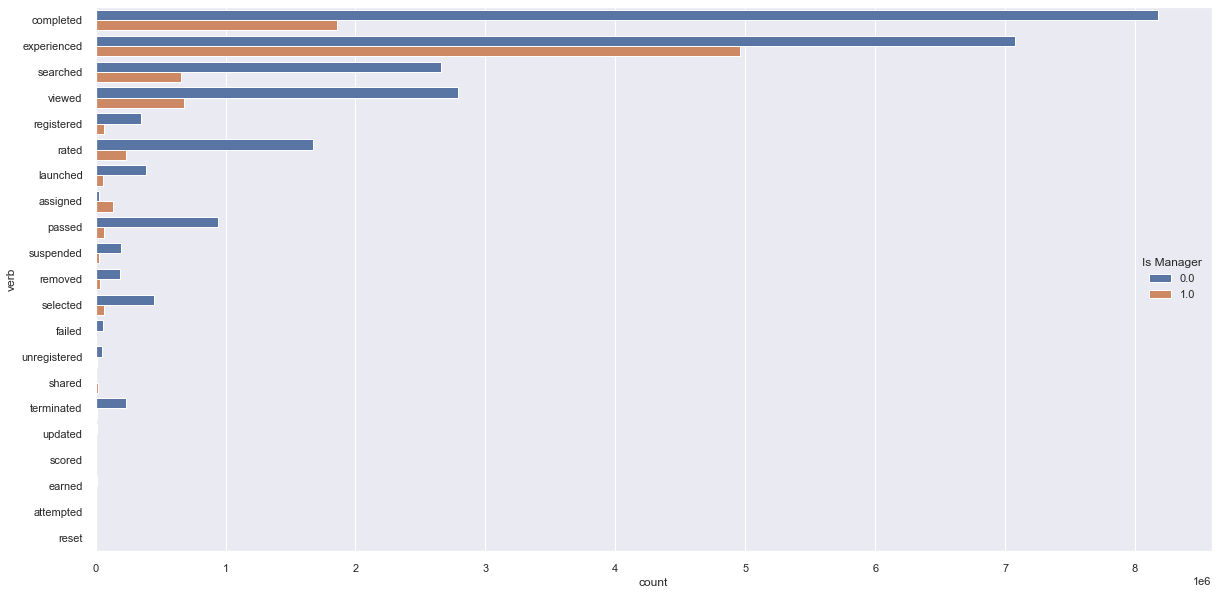

In [9]:
sns.set(rc = {'figure.figsize': (20, 10)})
sns.countplot(data=coles_df, y='verb', hue = 'Is Manager')

In [10]:
verbs = coles_df['verb'].unique().tolist()
coles_df1 = coles_df[coles_df['verb'].isin(verbs[:7])]
coles_df2 = coles_df[coles_df['verb'].isin(verbs[7:14])]
coles_df3 = coles_df[coles_df['verb'].isin(verbs[14:])]

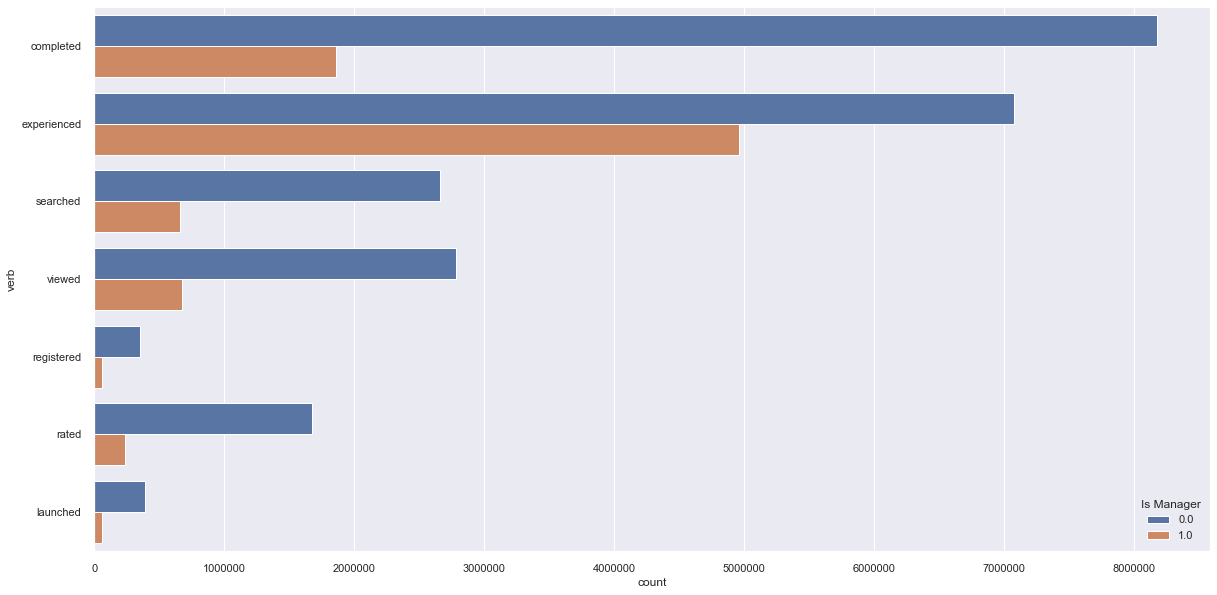

In [11]:
# Graph 1 

sns.set(rc = {'figure.figsize': (20, 10)})
sns.countplot(data=coles_df1, y='verb', hue = 'Is Manager')
plt.ticklabel_format(style = 'plain', axis = 'x', useOffset=False)

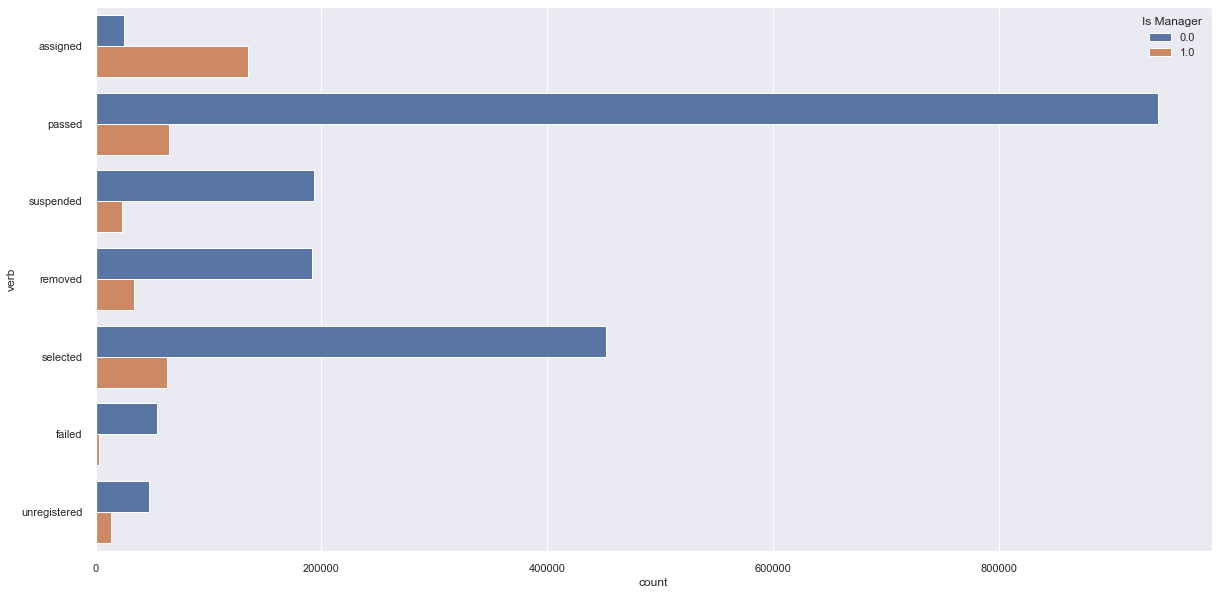

In [12]:
# Graph 2 

sns.set(rc = {'figure.figsize': (20, 10)})
sns.countplot(data=coles_df2, y='verb', hue = 'Is Manager')
plt.ticklabel_format(style = 'plain', axis = 'x', useOffset=False)

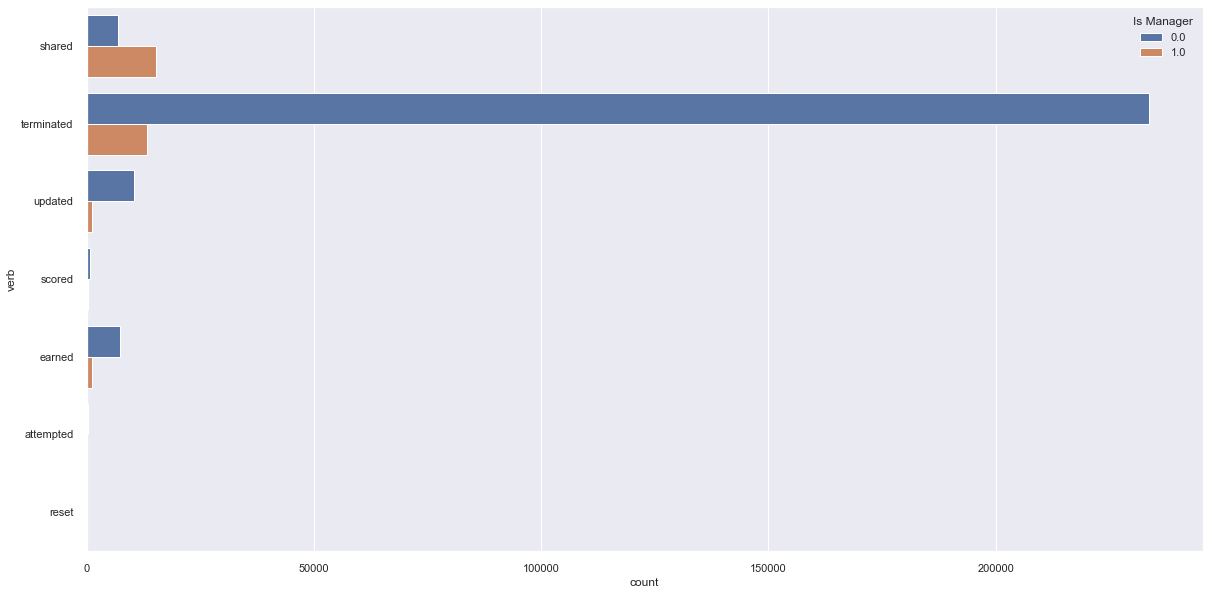

In [13]:
# Graph 3

sns.set(rc = {'figure.figsize': (20, 10)})
sns.countplot(data=coles_df3, y='verb', hue = 'Is Manager')
plt.ticklabel_format(style = 'plain', axis = 'x', useOffset=False)

# Separate Staff & Manager & New Starter Data

In [7]:
coles_df_staff = coles_df[coles_df['Is Manager'] == 0]
coles_df_staff = coles_df_staff.reset_index(drop=True)

coles_df_manager = coles_df[coles_df['Is Manager'] == 1]
coles_df_manager = coles_df_manager.reset_index(drop=True)

# Filtering Manager's Assigned Learning Activities

In [8]:
coles_df_manager_filtered = coles_df_manager.loc[(coles_df_manager['contained'].notnull()) & (coles_df_manager['verb'] == 'assigned')]
coles_df_manager_filtered

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
178,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-03T06:40:24.249Z,"[3257, 'assigned']",32.420
179,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-03T06:40:56.669Z,"[38537, 'assigned']",26.245
279,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[123524, 'assigned']",0.000
280,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[66113, 'assigned']",0.000
310,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-23T03:36:00.717Z,"[10615, 'assigned']",1758.525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875784,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],0.0,1.0,1,2,2022-06-24T07:48:46.751Z,"[103353, 'assigned']",8.989
8875787,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,2022-06-24T07:49:17.851Z,"[103353, 'assigned']",6.600
8875794,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,2022-06-25T01:05:08.733Z,"[140850, 'assigned']",17.722
8875801,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,2022-06-25T05:37:31.897Z,"[97600, 'assigned']",0.000


In [10]:
coles_df_manager_filtered.to_csv(r'manager_assigned_activities.csv', index = False, header = True)

# Excluding Manager Assigned Learning

In [9]:
coles_df_manager_filtered_new = coles_df_manager_filtered.loc[coles_df_manager_filtered['contained'] != "['unrecorded', 'assigned']"]
coles_df_manager_filtered_new

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
178,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-03T06:40:24.249Z,"[3257, 'assigned']",32.420
179,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-03T06:40:56.669Z,"[38537, 'assigned']",26.245
279,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[123524, 'assigned']",0.000
280,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[66113, 'assigned']",0.000
310,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-23T03:36:00.717Z,"[10615, 'assigned']",1758.525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875784,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],0.0,1.0,1,2,2022-06-24T07:48:46.751Z,"[103353, 'assigned']",8.989
8875787,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,2022-06-24T07:49:17.851Z,"[103353, 'assigned']",6.600
8875794,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,2022-06-25T01:05:08.733Z,"[140850, 'assigned']",17.722
8875801,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,2022-06-25T05:37:31.897Z,"[97600, 'assigned']",0.000


In [12]:
coles_df_manager_filtered_new.to_csv(r'manager_assigned_activities_new.csv', index = False, header = True)

In [10]:
coles_df_manager_filtered_new['contained'] = coles_df_manager_filtered_new['contained'].astype(str)
coles_df_manager_filtered_new[['assigned_id', 'assigned_verb']] = coles_df_manager_filtered_new['contained'].str.split(',', expand=True)
coles_df_manager_filtered_new

/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_1947/293281928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coles_df_manager_filtered_new['contained'] = coles_df_manager_filtered_new['contained'].astype(str)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration,assigned_id,assigned_verb
178,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-03T06:40:24.249Z,"[3257, 'assigned']",32.420,[3257,'assigned']
179,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-03T06:40:56.669Z,"[38537, 'assigned']",26.245,[38537,'assigned']
279,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[123524, 'assigned']",0.000,[123524,'assigned']
280,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[66113, 'assigned']",0.000,[66113,'assigned']
310,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-23T03:36:00.717Z,"[10615, 'assigned']",1758.525,[10615,'assigned']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875784,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],0.0,1.0,1,2,2022-06-24T07:48:46.751Z,"[103353, 'assigned']",8.989,[103353,'assigned']
8875787,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,2022-06-24T07:49:17.851Z,"[103353, 'assigned']",6.600,[103353,'assigned']
8875794,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,2022-06-25T01:05:08.733Z,"[140850, 'assigned']",17.722,[140850,'assigned']
8875801,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,2022-06-25T05:37:31.897Z,"[97600, 'assigned']",0.000,[97600,'assigned']


In [11]:
coles_df_manager_filtered_new[['space', 'assigned_id']] = coles_df_manager_filtered_new['assigned_id'].str.split('[', expand=True)
coles_df_manager_filtered_new = coles_df_manager_filtered_new.drop(['space'], axis=1)
coles_df_manager_filtered_new['assigned_id'] = pd.to_numeric(coles_df_manager_filtered_new['assigned_id'])
coles_df_manager_filtered_new

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration,assigned_id,assigned_verb
178,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-03T06:40:24.249Z,"[3257, 'assigned']",32.420,3257,'assigned']
179,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-03T06:40:56.669Z,"[38537, 'assigned']",26.245,38537,'assigned']
279,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[123524, 'assigned']",0.000,123524,'assigned']
280,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[66113, 'assigned']",0.000,66113,'assigned']
310,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-23T03:36:00.717Z,"[10615, 'assigned']",1758.525,10615,'assigned']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875784,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],0.0,1.0,1,2,2022-06-24T07:48:46.751Z,"[103353, 'assigned']",8.989,103353,'assigned']
8875787,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,2022-06-24T07:49:17.851Z,"[103353, 'assigned']",6.600,103353,'assigned']
8875794,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,2022-06-25T01:05:08.733Z,"[140850, 'assigned']",17.722,140850,'assigned']
8875801,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,2022-06-25T05:37:31.897Z,"[97600, 'assigned']",0.000,97600,'assigned']


# Merging manager assigned learning activities table with assigned-to who table 

In [12]:
merged_table = pd.merge(coles_df_manager_filtered_new, coles_df, how = 'left', left_on = ['assigned_id', 'activity_url'], right_on = ['actorId', 'activity_url'])
merged_table

,actorId_x,verb_x,type_x,activity_x,activity_url,ancestors_x,completion_x,Is Manager_x,Is New Starter_x,Time Zone_x,...,type_y,activity_y,ancestors_y,completion_y,Is Manager_y,Is New Starter_y,Time Zone_y,timestamp_y,contained_y,duration_y
0,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,1.0,0.0,0.0,2021-08-24T00:59:26.884Z,NaN,0.000
1,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,0.0,0.0,0.0,2022-02-23T19:42:28.167Z,NaN,0.000
3,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,0.0,0.0,2.0,2022-01-27T21:36:00.801Z,NaN,0.000
4,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],0.0,1.0,0.0,0.0,2021-07-13T04:44:39.271Z,"[67096, 'shared']",9.849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250337,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,...,lesson,activities,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:00:25.335Z,NaN,19.012
250338,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,...,lesson,activities,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:01:06.853Z,NaN,464.397
250339,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250340,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Further Cleaning
merged_table = merged_table.drop(['assigned_verb'], axis=1)

# Remove rows where there are values in contained 
merged_table_filtered = merged_table.loc[merged_table['contained_y'].isnull()]
merged_table_filtered

,actorId_x,verb_x,type_x,activity_x,activity_url,ancestors_x,completion_x,Is Manager_x,Is New Starter_x,Time Zone_x,...,type_y,activity_y,ancestors_y,completion_y,Is Manager_y,Is New Starter_y,Time Zone_y,timestamp_y,contained_y,duration_y
0,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,1.0,0.0,0.0,2021-08-24T00:59:26.884Z,NaN,0.000
1,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,0.0,0.0,0.0,2022-02-23T19:42:28.167Z,NaN,0.000
3,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,0.0,0.0,2.0,2022-01-27T21:36:00.801Z,NaN,0.000
5,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],NaN,1.0,0.0,0.0,2021-08-23T03:35:47.222Z,NaN,25.687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250337,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,...,lesson,activities,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:00:25.335Z,NaN,19.012
250338,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,...,lesson,activities,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:01:06.853Z,NaN,464.397
250339,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250340,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/be05d970...,['activities'],0.0,1.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Remove rows where there is no actorID in the assigned field

merged_table_filtered_new = merged_table_filtered[merged_table_filtered['actorId_y'].notnull()]
merged_table_filtered_new

,actorId_x,verb_x,type_x,activity_x,activity_url,ancestors_x,completion_x,Is Manager_x,Is New Starter_x,Time Zone_x,...,type_y,activity_y,ancestors_y,completion_y,Is Manager_y,Is New Starter_y,Time Zone_y,timestamp_y,contained_y,duration_y
0,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,1.0,0.0,0.0,2021-08-24T00:59:26.884Z,NaN,0.000
2,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,0.0,0.0,0.0,2022-02-23T19:42:28.167Z,NaN,0.000
3,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,0.0,0.0,2.0,2022-01-27T21:36:00.801Z,NaN,0.000
5,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],NaN,1.0,0.0,0.0,2021-08-23T03:35:47.222Z,NaN,25.687
6,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,...,NaN,activities,['activities'],1.0,1.0,0.0,0.0,2021-08-23T04:06:30.434Z,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250334,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],0.0,1.0,1,2,...,lesson,activities,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:08:51.25Z,NaN,4.146
250335,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],0.0,1.0,1,2,...,lesson,activities,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:08:55.396Z,NaN,63.207
250336,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,...,lesson,activities,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:00:12.875Z,NaN,12.460
250337,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,...,lesson,activities,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:00:25.335Z,NaN,19.012


In [98]:
merged_table_filtered_new.to_csv(r'merged_table.csv', index = False, header = True)

# Identify Activities Assigned to Staff & Remove them

In [15]:
assigned_activities_staff = merged_table_filtered_new.drop(['actorId_x', 'verb_x', 'type_x', 'activity_x', 'ancestors_x', 'completion_x', 'Is Manager_x', 'Is New Starter_x', 'Time Zone_x', 'timestamp_x', 'contained_x', 'duration_x', 'assigned_id'], axis = 1)
assigned_activities_staff = assigned_activities_staff.rename(columns={
    'actorId_y': 'actorId',
    'verb_y': 'verb',
    'type_y': 'type',
    'activity_y': 'activity',
    'ancestors_y': 'ancestors',
    'completion_y': 'completion',
    'Is Manager_y': 'Is Manager',
    'Is New Starter_y': 'Is New Starter',
    'Time Zone_y': 'Time Zone',
    'timestamp_y': 'timestamp',
    'contained_y': 'contained',
    'duration_y': 'duration'
})
assigned_activities_staff
col = assigned_activities_staff.pop('activity_url')
assigned_activities_staff.insert(4, 'activity_url', col)
assigned_activities_staff

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,3257.0,completed,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],1.0,1.0,0.0,0.0,2021-08-24T00:59:26.884Z,NaN,0.000
2,123524.0,completed,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],1.0,0.0,0.0,0.0,2022-02-23T19:42:28.167Z,NaN,0.000
3,66113.0,completed,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],1.0,0.0,0.0,2.0,2022-01-27T21:36:00.801Z,NaN,0.000
5,10615.0,registered,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],NaN,1.0,0.0,0.0,2021-08-23T03:35:47.222Z,NaN,25.687
6,10615.0,completed,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],1.0,1.0,0.0,0.0,2021-08-23T04:06:30.434Z,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250334,103353.0,completed,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:08:51.25Z,NaN,4.146
250335,103353.0,completed,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:08:55.396Z,NaN,63.207
250336,103353.0,passed,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:00:12.875Z,NaN,12.460
250337,103353.0,suspended,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],1.0,0.0,0.0,2.0,2022-06-27T12:00:25.335Z,NaN,19.012


In [119]:
assigned_activities_staff.to_csv(r'assigned_activities_staff.csv', index = False, header = True)

In [17]:
coles_df_copy = coles_df
coles_df_copy

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,0.000
1,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0,0,2021-07-06T02:08:30Z,NaN,17.738
2,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0,0,2021-07-06T02:08:47.738Z,NaN,0.034
3,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0,0,2021-07-06T02:08:47.772Z,NaN,25.380
4,0.0,experienced,NaN,explore,https://coles.hub.clearlrs.com/explore,"['home', 'explore']",0.0,1.0,0,0,2021-07-06T02:09:13.152Z,NaN,14.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34196052,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/821702c0...,['activities'],1.0,NaN,0,7,2021-10-28T23:41:21Z,NaN,0.000
34196053,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/f158b380...,['activities'],1.0,NaN,0,7,2021-10-28T23:41:21Z,NaN,253.160
34196054,174732.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,NaN,0,7,2021-10-28T23:45:34.16Z,NaN,0.034
34196055,174733.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,0.0,0,2,2021-10-28T23:49:26.387Z,NaN,467.287


In [18]:
coles_df_copy = pd.concat([coles_df_copy, assigned_activities_staff])

In [19]:
coles_df_copy = coles_df_copy.drop_duplicates(keep=False)

In [20]:
coles_df_copy

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0.0,0.0,2021-07-01T00:00:00Z,NaN,0.000
1,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0.0,0.0,2021-07-06T02:08:30Z,NaN,17.738
2,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0.0,0.0,2021-07-06T02:08:47.738Z,NaN,0.034
3,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0.0,0.0,2021-07-06T02:08:47.772Z,NaN,25.380
4,0.0,experienced,NaN,explore,https://coles.hub.clearlrs.com/explore,"['home', 'explore']",0.0,1.0,0.0,0.0,2021-07-06T02:09:13.152Z,NaN,14.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34196052,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/821702c0...,['activities'],1.0,NaN,0.0,7.0,2021-10-28T23:41:21Z,NaN,0.000
34196053,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/f158b380...,['activities'],1.0,NaN,0.0,7.0,2021-10-28T23:41:21Z,NaN,253.160
34196054,174732.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,NaN,0.0,7.0,2021-10-28T23:45:34.16Z,NaN,0.034
34196055,174733.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,0.0,0.0,2.0,2021-10-28T23:49:26.387Z,NaN,467.287


In [23]:
coles_df_copy.to_csv(r'final_dataset_removed_assigned_activities.csv', index = False, header = True)

# Identify Activities Assigned By Managers & Remove Them

In [24]:
managers_assigned_activities = merged_table_filtered_new.drop(['actorId_y', 'verb_y', 'type_y', 'activity_y', 'ancestors_y', 'Is Manager_y', 'Is New Starter_y', 'Time Zone_y', 'timestamp_y', 'duration_y', 'completion_y', 'contained_y'], axis = 1)
managers_assigned_activities = managers_assigned_activities.drop(['assigned_id'], axis = 1)
managers_assigned_activities = managers_assigned_activities.rename(columns={
    'actorId_x': 'actorId', 
    'verb_x': 'verb', 
    'type_x': 'type',
    'activity_x': 'activity',
    'ancestors_x': 'ancestors',
    'completion_x': 'completion',
    'Is Manager_x': 'Is Manager',
    'Is New Starter_x': 'Is New Starter',
    'Time Zone_x': 'Time Zone',
    'timestamp_x': 'timestamp', 
    'contained_x': 'contained',
    'duration_x': 'duration'})
managers_assigned_activities

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-03T06:40:24.249Z,"[3257, 'assigned']",32.420
2,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[123524, 'assigned']",0.000
3,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-20T22:36:50.951Z,"[66113, 'assigned']",0.000
5,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-23T03:36:00.717Z,"[10615, 'assigned']",1758.525
6,0.0,assigned,NaN,activities,https://coles.clearlrs.com/activities/a6f7fa90...,['activities'],0.0,1.0,0,0,2021-08-23T03:36:00.717Z,"[10615, 'assigned']",1758.525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250334,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],0.0,1.0,1,2,2022-06-24T07:48:46.751Z,"[103353, 'assigned']",8.989
250335,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/transact...,['activities'],0.0,1.0,1,2,2022-06-24T07:48:46.751Z,"[103353, 'assigned']",8.989
250336,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,2022-06-24T07:49:17.851Z,"[103353, 'assigned']",6.600
250337,163054.0,assigned,lesson,activities,https://coles.clearlrs.com/activities/Coles_ACO,['activities'],0.0,1.0,1,2,2022-06-24T07:49:17.851Z,"[103353, 'assigned']",6.600


In [25]:
managers_assigned_activities.to_csv(r'managers_assigned_activities.csv', index = False, header = True)

In [26]:
coles_df_copy_new = pd.concat([coles_df_copy, managers_assigned_activities])

In [27]:
coles_df_copy_new = coles_df_copy_new.drop_duplicates(keep=False)

In [28]:
coles_df_copy_new

,actorId,verb,type,activity,activity_url,ancestors,completion,Is Manager,Is New Starter,Time Zone,timestamp,contained,duration
0,0.0,completed,event,activities,https://coles.clearlrs.com/activities/d49baa00...,['activities'],1.0,1.0,0.0,0.0,2021-07-01T00:00:00Z,NaN,0.000
1,0.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,1.0,0.0,0.0,2021-07-06T02:08:30Z,NaN,17.738
2,0.0,experienced,NaN,notifications,https://coles.hub.clearlrs.com/profile/notific...,"['home', 'profile', 'notifications']",0.0,1.0,0.0,0.0,2021-07-06T02:08:47.738Z,NaN,0.034
3,0.0,experienced,NaN,profile,https://coles.hub.clearlrs.com/profile,"['home', 'profile']",0.0,1.0,0.0,0.0,2021-07-06T02:08:47.772Z,NaN,25.380
4,0.0,experienced,NaN,explore,https://coles.hub.clearlrs.com/explore,"['home', 'explore']",0.0,1.0,0.0,0.0,2021-07-06T02:09:13.152Z,NaN,14.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34196052,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/821702c0...,['activities'],1.0,NaN,0.0,7.0,2021-10-28T23:41:21Z,NaN,0.000
34196053,174731.0,completed,module,activities,https://coles.clearlrs.com/activities/f158b380...,['activities'],1.0,NaN,0.0,7.0,2021-10-28T23:41:21Z,NaN,253.160
34196054,174732.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,NaN,0.0,7.0,2021-10-28T23:45:34.16Z,NaN,0.034
34196055,174733.0,experienced,NaN,learning,https://coles.hub.clearlrs.com/learning,"['home', 'learning']",0.0,0.0,0.0,2.0,2021-10-28T23:49:26.387Z,NaN,467.287


In [29]:
coles_df_copy_new.to_csv(r'final_dataset_removed_ALL_assigned_activities.csv', index = False, header = True)